Project Tumor Trace:MRI-based AI for Breast Cancer Detection

DATA UNDERSTANDING

Loading the Dataset

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import cv2


# Define the path to your dataset
data_dir = "breast_cancer_dataset"

# Check the directory structure
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

# Print the classes available in the train directory
print("Classes in training set:")
print(os.listdir(train_dir))

print("\nClasses in val set:")
print(os.listdir(val_dir))

print("\nClasses in test set:")
print(os.listdir(test_dir))

Classes in training set:
['Benign', 'Malignant']

Classes in val set:
['Benign', 'Malignant']

Classes in test set:
['Benign', 'Malignant']


ANALYZING THE DATASET:

counting the number of images present in each directory.

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

def count_images(directory):
   
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count images in the training set
train_class_counts = count_images(train_dir)
print("Number of images in each class (train):", train_class_counts)

Number of images in each class (train): {'Benign': 61, 'Malignant': 105}


DISPLAYING (sample images from these directory)

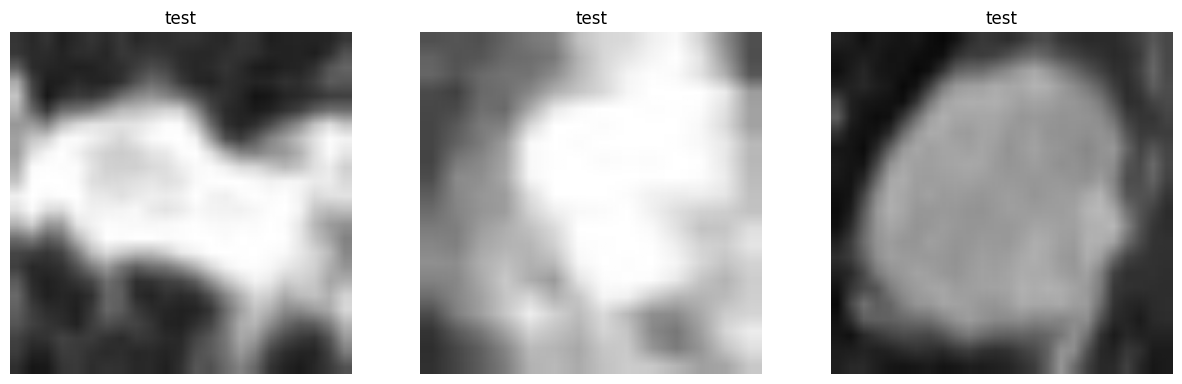

In [ ]:
import os
import random
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the path to your dataset
data_dir = 'breast_cancer_dataset'  # Use a raw string for Windows path

# Define the transformation for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),            # Convert images to PyTorch tensors
])

# Load the dataset
dataset = ImageFolder(root=data_dir, transform=transform)
class_names = dataset.classes  # Get class names

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

def display_random_images(dataset, class_names, num_images=3):
    # Get a random sample of images for each class
    for class_index, class_name in enumerate(class_names):
        # Filter images belonging to the current class
        class_images = [dataset[i][0] for i in range(len(dataset)) if dataset[i][1] == class_index]
        
        # Randomly select a few images
        if len(class_images) > 0:
            selected_images = random.sample(class_images, min(num_images, len(class_images)))
            plt.figure(figsize=(15, 5))
            for i in range(len(selected_images)):
                plt.subplot(1, len(selected_images), i + 1)
                plt.imshow(selected_images[i].permute(1, 2, 0).numpy())  # Convert from CxHxW to HxWxC
                plt.title(class_name)
                plt.axis('off')
            plt.show()

# Display random images from each class
display_random_images(dataset, class_names)
